In [1]:
#import dependency
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime
import os
import pandas as pd

In [2]:
# Output File (CSV)
output_data_file = "Source Data/Cafes_and_restaurants__with_seating_capacity.csv"

In [3]:
#reading the files
raw_df = pd.read_csv(output_data_file)
raw_df.head()

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.9595,-37.8206,POINT (144.9595 -37.8206)
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.9595,-37.8206,POINT (144.9595 -37.8206)
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.9623,-37.8195,POINT (144.9623 -37.8195)
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.9623,-37.8195,POINT (144.9623 -37.8195)
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.9623,-37.8195,POINT (144.9623 -37.8195)


In [4]:
#see the variety of industry within the dataset
unique_industry = raw_df['Industry (ANZSIC4) description'].unique()
industry_count = len(unique_industry)
print(unique_industry)
print(f'Number of total industry: {industry_count}')

['Zoological and Botanical Gardens Operation'
 'Other Personal Services n.e.c.'
 'Health and Fitness Centres and Gymnasia Operation'
 'Other Gambling Activities' 'Cafes and Restaurants'
 'Takeaway Food Services' 'Pubs, Taverns and Bars' 'Accommodation'
 'Internet Service Providers and Web Search Portals'
 'Fruit and Vegetable Retailing' 'Other Specialised Food Retailing'
 'Clubs (Hospitality)' 'Oil and Gas Extraction'
 'Other Interest Group Services n.e.c.'
 'Business and Professional Association Services'
 'Sport and Camping Equipment Retailing' 'Newspaper and Book Retailing'
 'Convenience Store' 'Professional Photographic Services'
 'Motor Cycle Retailing' 'Higher Education'
 'Fruit and Vegetable Wholesaling' 'Other Administrative Services n.e.c.'
 'Fresh Meat, Fish and Poultry Retailing'
 'Computer System Design and Related Services' 'Common Area'
 'Performing Arts Venue Operation'
 'Sports and Physical Recreation Clubs and Sports Professionals'
 'Fuel Retailing'
 'Horse and Dog Rac

In [5]:
#see the total unique address (by the business address) within the dataset
unique_business_address = raw_df['Business address'].unique()
unique_business_address_count = len(unique_business_address)
print(unique_business_address)
print(f'Number of total unique address: {unique_business_address_count}')

['469-479 King Street MELBOURNE 3000'
 'Vault 12, 387 Flinders Street MELBOURNE 3000'
 'Vault 1, 363-367 Flinders Street MELBOURNE 3000' ...
 '29 Melrose Street NORTH MELBOURNE VIC 3051'
 '31 Melrose Street NORTH MELBOURNE VIC 3051'
 '17 Melrose Street NORTH MELBOURNE VIC 3051']
Number of total unique address: 6917


In [6]:
#see the total unique location within the dataset, which should match with the business address
unique_Location = raw_df['Location'].unique()
unique_Location_count = len(unique_business_address)
print(unique_Location)
print(f'Number of total unique Location: {unique_Location_count}')

['POINT (144.9595 -37.8206)' 'POINT (144.9623 -37.8195)'
 'POINT (144.9653 -37.8187)' ... 'POINT (144.9353015 -37.79142168)'
 'POINT (144.9356959 -37.79223169)' 'POINT (144.9311131 -37.79436219)']
Number of total unique Location: 6917


In [7]:
by_building = raw_df.set_index('Building address').groupby(['Building address'])
by_building.head()

,Census year,Block ID,Property ID,Base property ID,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location
Building address,,,,,,,,,,,,,
0 King Street MELBOURNE 3000,2002,2,111467,103973,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.95950,-37.82060,POINT (144.9595 -37.8206)
0 King Street MELBOURNE 3000,2002,2,111467,103973,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.95950,-37.82060,POINT (144.9595 -37.8206)
363-397 Flinders Street MELBOURNE 3000,2002,4,103972,103972,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.96230,-37.81950,POINT (144.9623 -37.8195)
363-397 Flinders Street MELBOURNE 3000,2002,4,103972,103972,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.96230,-37.81950,POINT (144.9623 -37.8195)
363-397 Flinders Street MELBOURNE 3000,2002,4,103972,103972,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.96230,-37.81950,POINT (144.9623 -37.8195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72 Stubbs Street KENSINGTON VIC 3031,2020,2539,614669,614669,Kensington,72 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,30,144.93530,-37.79142,POINT (144.9353015 -37.79142168)
25-77 Stubbs Street KENSINGTON VIC 3031,2020,2540,617955,617955,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Outdoor,8,144.93570,-37.79223,POINT (144.9356959 -37.79223169)
25-77 Stubbs Street KENSINGTON VIC 3031,2020,2540,617955,617955,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,24,144.93570,-37.79223,POINT (144.9356959 -37.79223169)


In [8]:
raw_df.head()

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.9595,-37.8206,POINT (144.9595 -37.8206)
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.9595,-37.8206,POINT (144.9595 -37.8206)
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.9623,-37.8195,POINT (144.9623 -37.8195)
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.9623,-37.8195,POINT (144.9623 -37.8195)
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.9623,-37.8195,POINT (144.9623 -37.8195)


In [9]:
# Consolidate the industry type into 5 categories being:
# - The top 4 most frequent category; and
# - All other categories will be re-categorised into "Others".

## For each unique "Industry (ANZSIC4) description" count how many time it appears in the data set.
IndustryCount_df = pd.DataFrame(raw_df.groupby("Industry (ANZSIC4) description").size())
IndustryCount_df.rename(columns = {0:"Count"}, inplace = True)
IndustryCount_df.head()

## Sort IndustryCount_df descending order by column "Count" to identify the top 4 most frequent category.
IndustryCount_df = IndustryCount_df.sort_values(by=["Count"], ascending = False)
IndustryCount_df.head(4)

,Count
Industry (ANZSIC4) description,
Cafes and Restaurants,40431
Takeaway Food Services,7445
"Pubs, Taverns and Bars",3282
Accommodation,999


In [10]:
## Insert new column called "Recategorised Industry".
raw_df["Recategorised Industry"]=""
raw_df.head()

## Populate the "Recategorised Industry" Column to either state one of the top 4 industry or "Others" if it is not one of the top 4 industry.
def categorize(row):
    if row["Industry (ANZSIC4) description"]== "Cafes and Restaurants" :
        return "Cafes and Restaurants"
    elif row["Industry (ANZSIC4) description"]== "Takeaway Food Services" :
        return "Takeaway Food Services"
    elif row["Industry (ANZSIC4) description"]== "Pubs, Taverns and Bars" :
        return "Pubs, Taverns and Bars"
    elif row["Industry (ANZSIC4) description"]== "Accommodation" :
        return "Accommodation"
    else:
        return "Others"
raw_df["Recategorised Industry"]= raw_df.apply(lambda row: categorize(row), axis = 1)
    


In [11]:
raw_df

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location,Recategorised Industry
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54047,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Outdoor,8,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54048,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,24,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54049,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,169 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants
54050,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,173 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants


In [12]:
# Drop any rows with missing data
cleanraw_df = raw_df.dropna()
cleanraw_df

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location,Recategorised Industry
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54047,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Outdoor,8,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54048,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,24,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54049,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,169 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants
54050,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,173 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants


# Rosa's Bits

# Dhiren's Bits

# Michael's Bits

In [13]:
cleanraw_df.columns

Index(['Census year', 'Block ID', 'Property ID', 'Base property ID',
       'Building address', 'CLUE small area', 'Business address',
       'Industry (ANZSIC4) code', 'Industry (ANZSIC4) description',
       'Seating type', 'Number of seats', 'x coordinate', 'y coordinate',
       'Location', 'Recategorised Industry'],
      dtype='object')

In [54]:
year_place = cleanraw_df.groupby(["Census year", "CLUE small area"])["Industry (ANZSIC4) description"].count().reset_index()
year_place.columns = ["Year", "Area", "Count"]
year_place

,Year,Area,Count
0,2002,Carlton,241
1,2002,Docklands,24
2,2002,East Melbourne,39
3,2002,Kensington,8
4,2002,Melbourne (CBD),1081
...,...,...,...
242,2020,Port Melbourne,36
243,2020,South Yarra,17
244,2020,Southbank,238
245,2020,West Melbourne (Industrial),4


In [55]:
year_place["Count"].describe()

count     247.000000
mean      218.582996
std       428.657851
min         3.000000
25%        33.000000
50%        73.000000
75%       161.000000
max      1970.000000
Name: Count, dtype: float64

<AxesSubplot:>

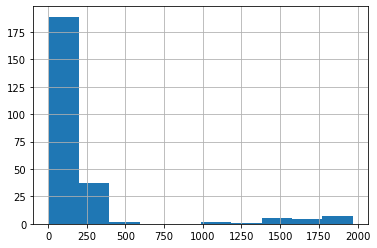

In [56]:
year_place["Count"].hist()

<AxesSubplot:>

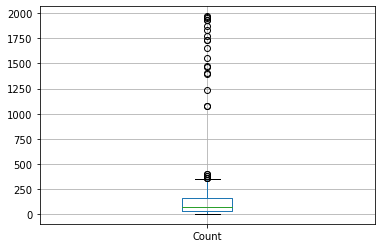

In [57]:
year_place[["Count"]].boxplot()

Text(0.5, 1.0, 'Count of Industry from 2002 - 2020')

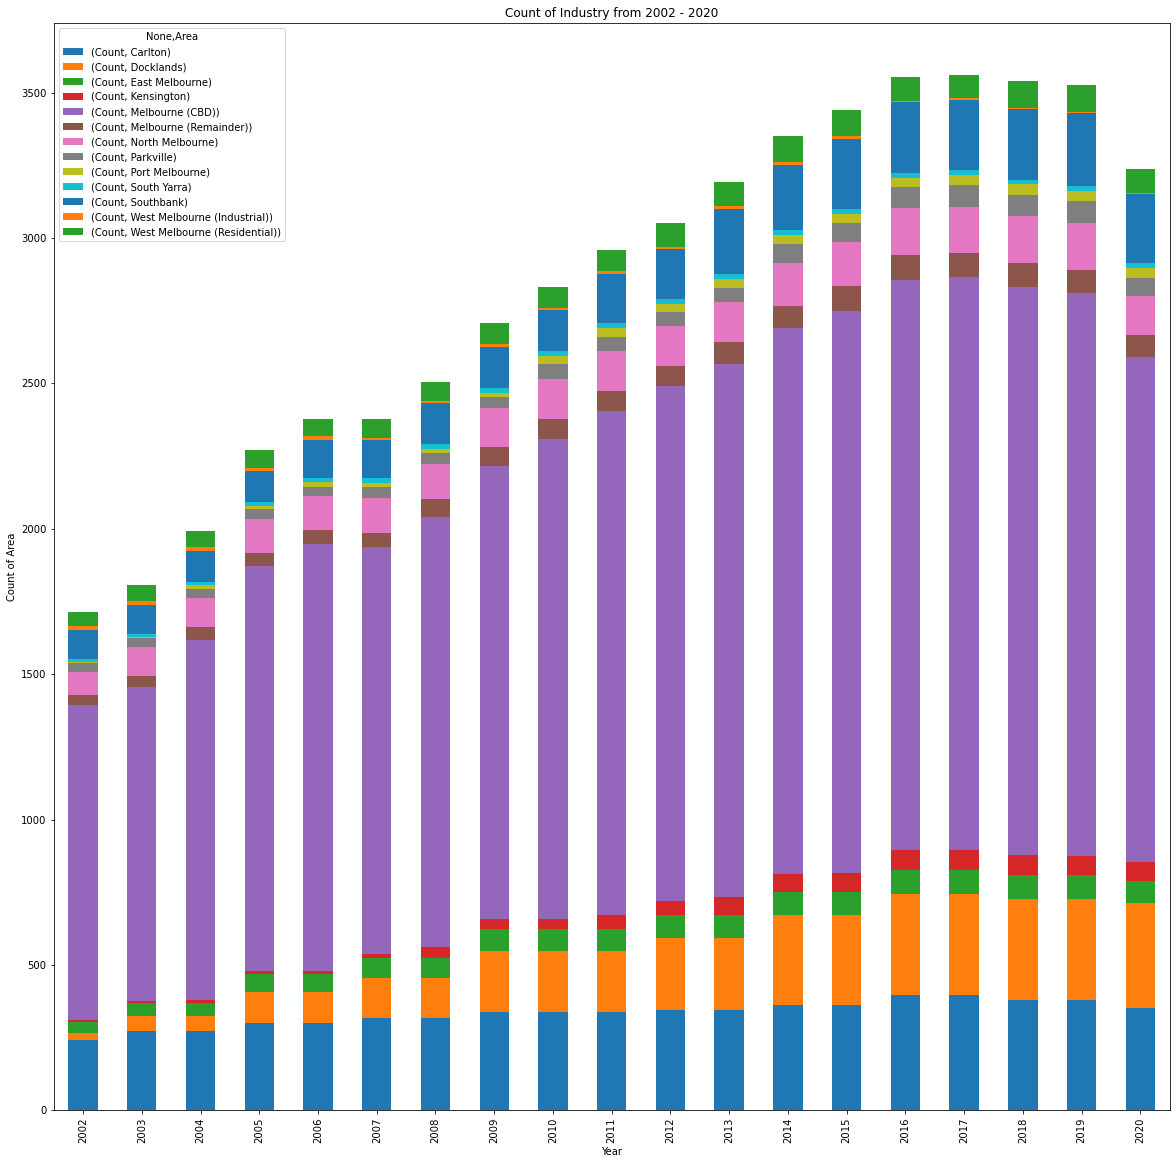

In [71]:
data = year_place.set_index(["Year", "Area"])
data.unstack().plot(kind="bar", figsize=(20,20), stacked=True)
plt.ylabel("Count of Area")
plt.title("Count of Industry from 2002 - 2020")

In [59]:
year_place.Area.value_counts()

Carlton                         19
Docklands                       19
East Melbourne                  19
Kensington                      19
Melbourne (CBD)                 19
Melbourne (Remainder)           19
North Melbourne                 19
Parkville                       19
Port Melbourne                  19
South Yarra                     19
Southbank                       19
West Melbourne (Industrial)     19
West Melbourne (Residential)    19
Name: Area, dtype: int64

In [65]:
year_place["Year"] = year_place["Year"].astype(str)

<AxesSubplot:xlabel='Year'>

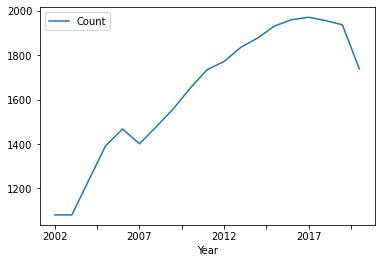

In [66]:
year_place.loc[year_place["Area"] == "Melbourne (CBD)"].set_index("Year").plot()

<AxesSubplot:xlabel='Year'>

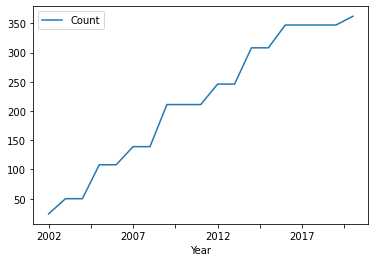

In [67]:
year_place.loc[year_place["Area"] == "Docklands"].set_index("Year").plot()

<AxesSubplot:xlabel='Year'>

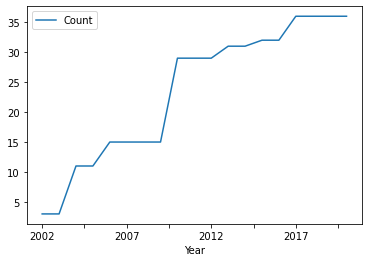

In [69]:
year_place.loc[year_place["Area"] == "Port Melbourne"].set_index("Year").plot()

# Brandon' Bits